In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns

In [10]:

# 1. Load the Total Demand Data
df = pd.read_csv('../Data/totaldemand_nsw.csv')

In [11]:
# 2. Convert the 'DATETIME' column to datetime format using dayfirst=True and set as index
df['DATETIME'] = pd.to_datetime(df['DATETIME'], dayfirst=True)
df.sort_values('DATETIME', inplace=True)
df.set_index('DATETIME', inplace=True)

In [12]:
# 3. Resample the data to analyze trends
# Calculate daily, weekly, and monthly average demand using the 'TOTALDEMAND' column
daily_demand = df['TOTALDEMAND'].resample('D').mean()
weekly_demand = df['TOTALDEMAND'].resample('W').mean()
monthly_demand = df['TOTALDEMAND'].resample('M').mean()

C:\Users\mzafa\AppData\Local\Temp\ipykernel_21556\4252369693.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_demand = df['TOTALDEMAND'].resample('M').mean()


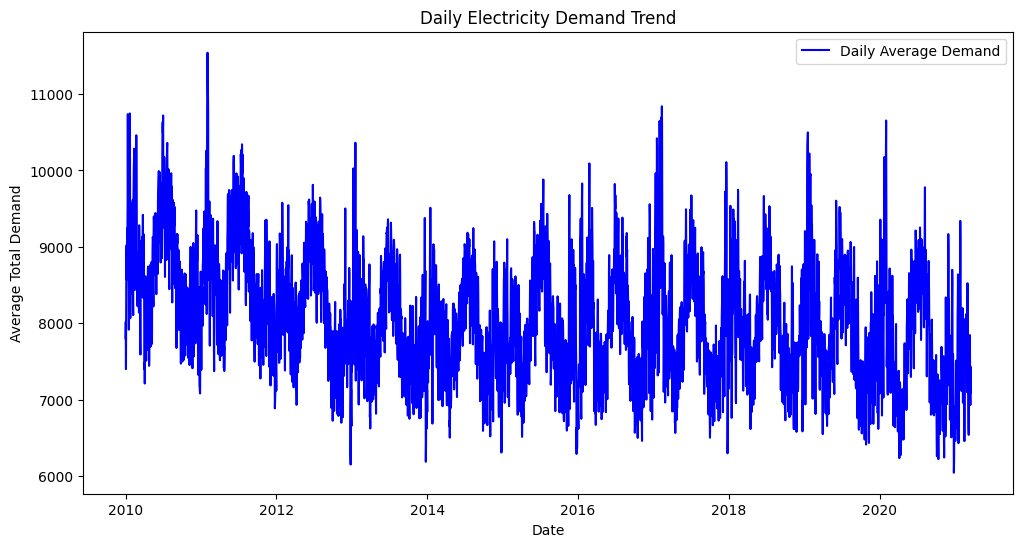

In [13]:
# 4. Plot Daily Trend
plt.figure(figsize=(12, 6))
plt.plot(daily_demand.index, daily_demand, label='Daily Average Demand', color='blue')
plt.xlabel('Date')
plt.ylabel('Average Total Demand')
plt.title('Daily Electricity Demand Trend')
plt.legend()
plt.show()

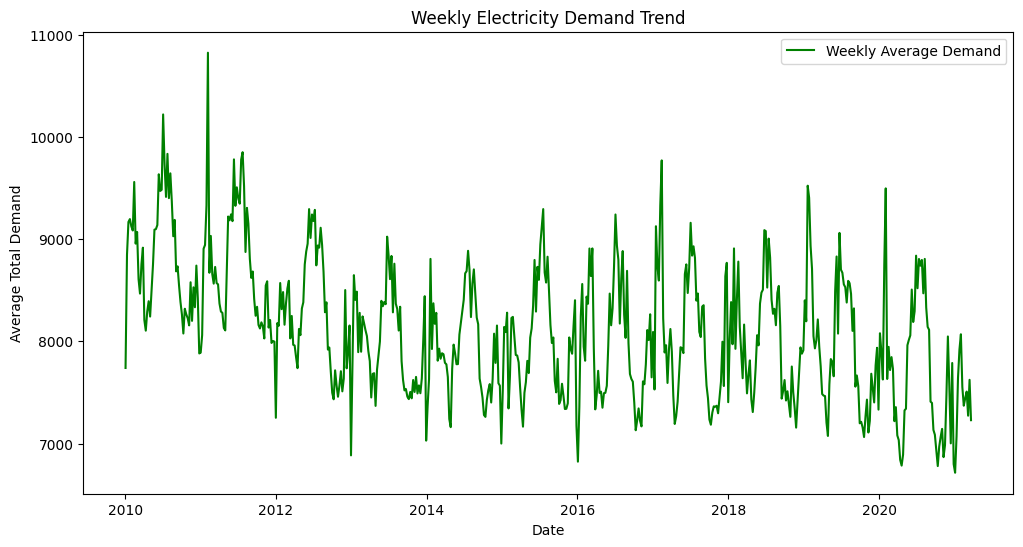

In [6]:
# 5. Plot Weekly Trend
plt.figure(figsize=(12, 6))
plt.plot(weekly_demand.index, weekly_demand, label='Weekly Average Demand', color='green')
plt.xlabel('Date')
plt.ylabel('Average Total Demand')
plt.title('Weekly Electricity Demand Trend')
plt.legend()
plt.show()


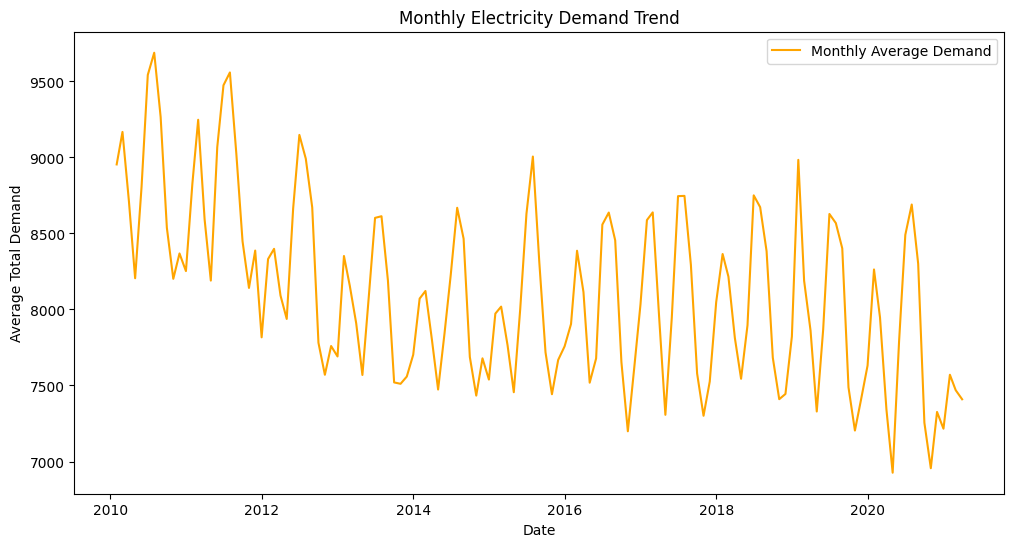

In [7]:
# 6. Plot Monthly Trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_demand.index, monthly_demand, label='Monthly Average Demand', color='orange')
plt.xlabel('Date')
plt.ylabel('Average Total Demand')
plt.title('Monthly Electricity Demand Trend')
plt.legend()
plt.show()

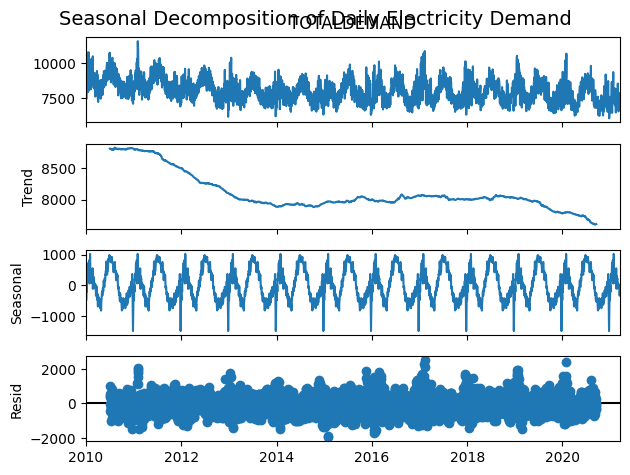

In [8]:
# 7. Perform Seasonal Decomposition on Daily Data
# Assuming an annual cycle (period=365) for seasonal patterns
decomposition = seasonal_decompose(daily_demand, model='additive', period=365)
decomposition.plot()
plt.suptitle('Seasonal Decomposition of Daily Electricity Demand', fontsize=14)
plt.show()

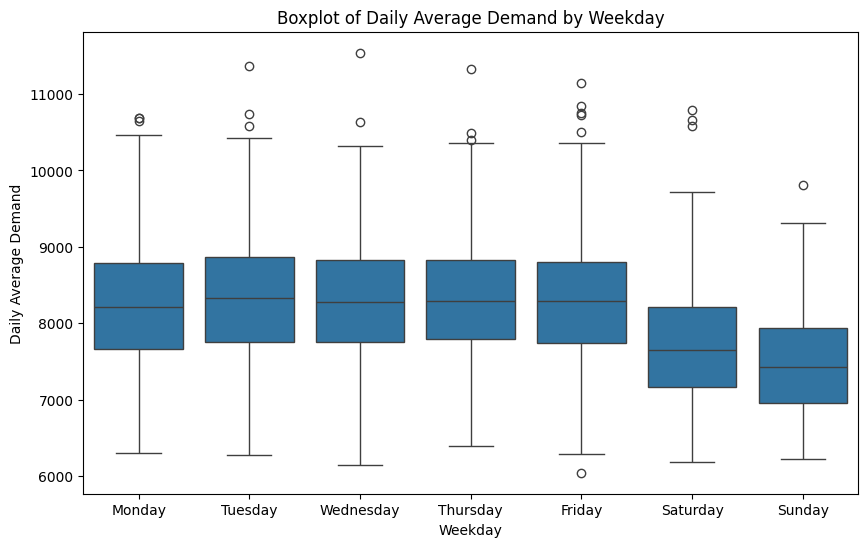

In [9]:
# 8. Create a Daily Boxplot Grouped by Weekday
# Convert daily_demand Series into a DataFrame with a weekday column
daily_df = daily_demand.to_frame(name='demand')
daily_df['weekday'] = daily_df.index.day_name()

# Define the correct weekday order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create the boxplot using seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='weekday', y='demand', data=daily_df, order=weekday_order)
plt.xlabel('Weekday')
plt.ylabel('Daily Average Demand')
plt.title('Boxplot of Daily Average Demand by Weekday')
plt.show()